In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
email=pd.read_csv(r'C:\Users\tegae\Downloads\spam_email_dataset.csv')

In [5]:
email.head()

,Email,Subject,Sender,Recipient,Date,Time,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
0,mikerusso@example.net,Even hotel community church.,emilyscott@example.org,gregorysmith@example.org,13-02-2023,04:13,3,0,191,32,3,3,0,11,1,1
1,waynebailey@example.org,Try themselves guess fight white agreement thu...,annwhite@example.net,gonzalezdaniel@example.net,09-08-2023,06:15,3,9,45,1,2,1,2,8,2,1
2,jill43@example.com,Environmental commercial off seem any conference.,david88@example.net,michellebaker@example.net,16-05-2023,01:32,3,9,52,1,4,0,2,10,1,1
3,johnsonkaren@example.org,Smile real TV father commercial day increase.,lindaalvarez@example.com,schroedertodd@example.com,25-04-2023,14:50,2,3,75,6,0,2,0,8,2,0
4,markwilson@example.org,Fast stage he oil institution.,vstafford@example.com,emilywilliams@example.com,11-07-2023,21:44,3,5,299,279,0,2,0,6,1,1


In [27]:
email.shape

(6000, 16)

In [28]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Email              6000 non-null   object
 1   Subject            6000 non-null   object
 2   Sender             6000 non-null   object
 3   Recipient          6000 non-null   object
 4   Date               6000 non-null   object
 5   Time               6000 non-null   object
 6   Attachments        6000 non-null   int64 
 7   Link Count         6000 non-null   int64 
 8   Word Count         6000 non-null   int64 
 9   Uppercase Count    6000 non-null   int64 
 10  Exclamation Count  6000 non-null   int64 
 11  Question Count     6000 non-null   int64 
 12  Dollar Count       6000 non-null   int64 
 13  Punctuation Count  6000 non-null   int64 
 14  HTML Tags Count    6000 non-null   int64 
 15  Spam Indicator     6000 non-null   int64 
dtypes: int64(10), object(6)
memory usage: 750.

In [7]:
email.columns

Index(['Email', 'Subject', 'Sender', 'Recipient', 'Date', 'Time',
       'Attachments', 'Link Count', 'Word Count', 'Uppercase Count',
       'Exclamation Count', 'Question Count', 'Dollar Count',
       'Punctuation Count', 'HTML Tags Count', 'Spam Indicator'],
      dtype='object')

In [34]:
email['Recipient'].nunique()

5926

In [35]:
email['Spam Indicator'].value_counts()

Spam Indicator
0    3018
1    2982
Name: count, dtype: int64

In [37]:
email.describe()

,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,1.497833,5.005500,153.269500,75.997667,2.481833,1.486000,0.989500,7.549667,2.528833,0.497000
std,1.125555,3.166092,83.135747,64.735568,1.717895,1.118785,0.812301,4.624619,1.703522,0.500033
min,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,83.000000,23.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000
50%,1.000000,5.000000,154.000000,59.000000,2.000000,1.000000,1.000000,8.000000,3.000000,0.000000
75%,3.000000,8.000000,223.000000,114.000000,4.000000,2.000000,2.000000,12.000000,4.000000,1.000000
max,3.000000,10.000000,300.000000,300.000000,5.000000,3.000000,2.000000,15.000000,5.000000,1.000000


In [39]:
brief=email[['Attachments', 'Link Count', 'Word Count', 'Uppercase Count',
       'Exclamation Count', 'Question Count', 'Dollar Count',
       'Punctuation Count', 'HTML Tags Count', 'Spam Indicator']]

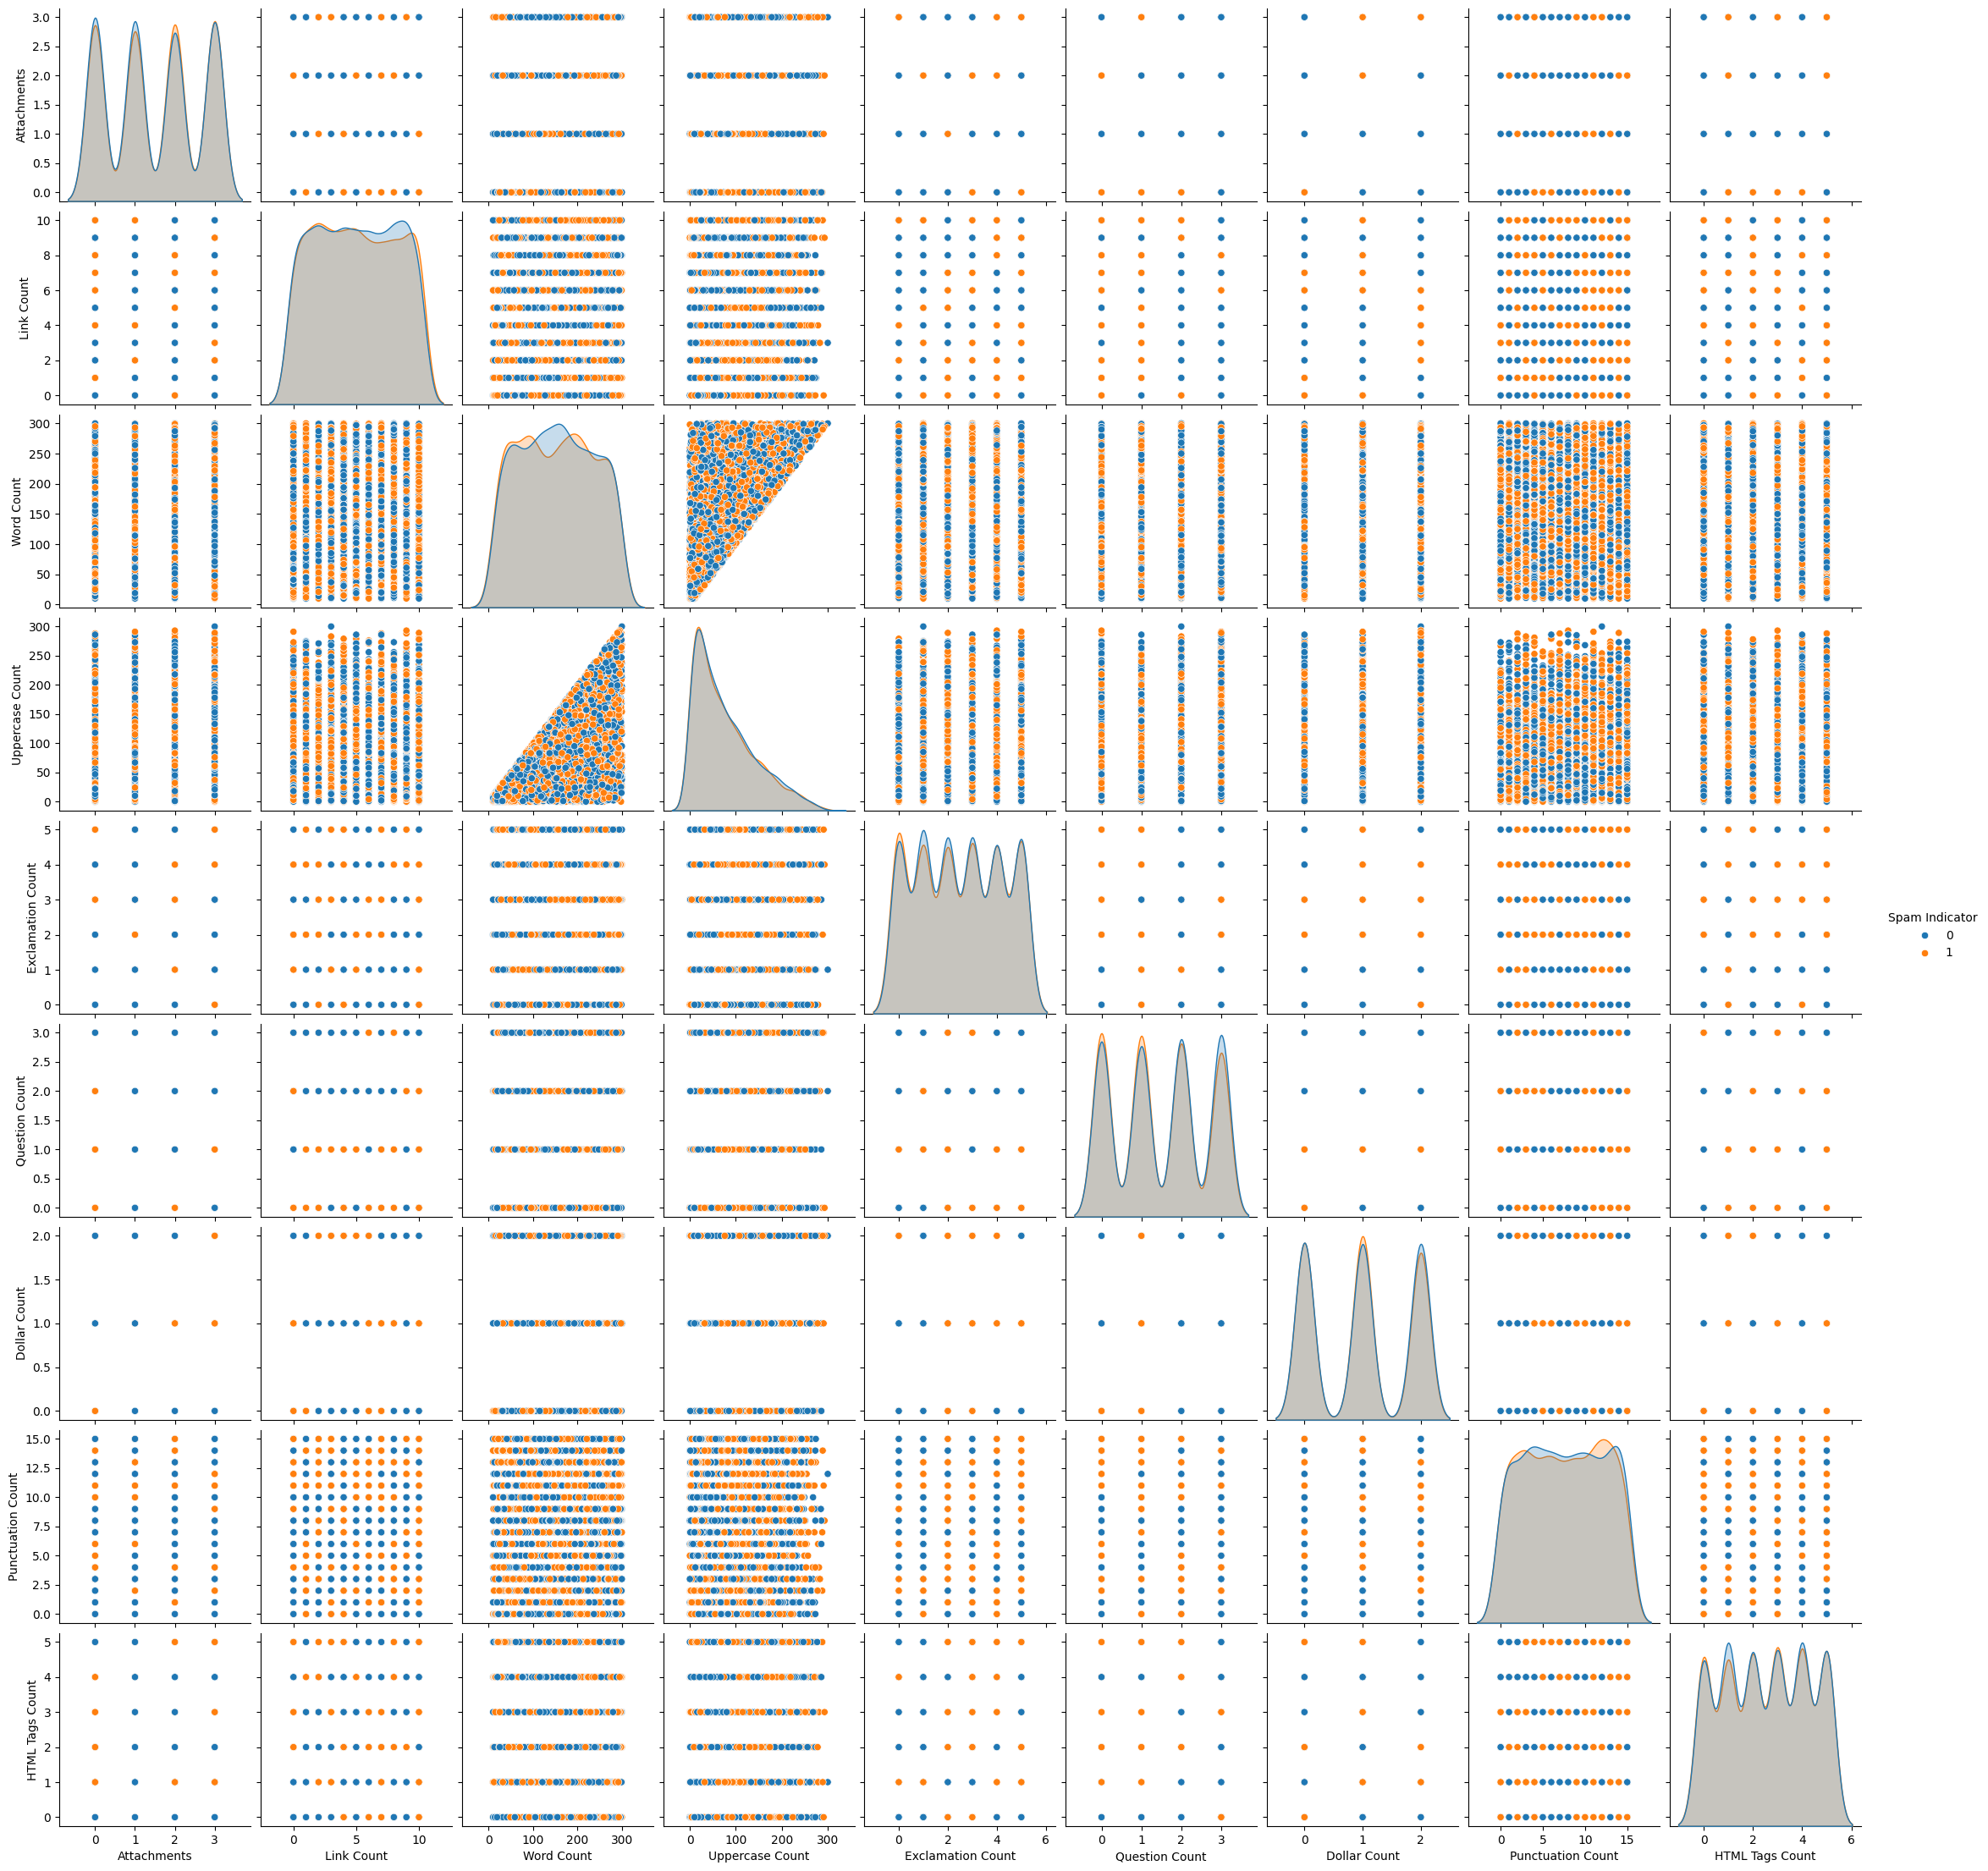

In [41]:
sns.pairplot(brief,hue='Spam Indicator')

In [43]:
X=email.drop(['Email', 'Subject', 'Sender', 'Recipient', 'Date', 'Time','Spam Indicator'],axis=1)
y=email['Spam Indicator']

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler=StandardScaler()

In [48]:
X_scaled=scaler.fit_transform(X)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=23)

In [51]:
from sklearn.linear_model import LogisticRegression

In [65]:
logmodel=LogisticRegression(max_iter=1000)

In [66]:
results=logmodel.fit(X_train,y_train)

In [67]:
results.score(X_train,y_train)

0.5224444444444445

In [56]:
from sklearn.metrics import classification_report,confusion_matrix

In [57]:
y_pred=results.predict(X_test)

In [59]:
print('Matrix\n',confusion_matrix(y_test,y_pred))
print('\n')
print('Report\n',classification_report(y_test,y_pred))

Matrix
 [[468 256]
 [510 266]]


Report
               precision    recall  f1-score   support

           0       0.48      0.65      0.55       724
           1       0.51      0.34      0.41       776

    accuracy                           0.49      1500
   macro avg       0.49      0.49      0.48      1500
weighted avg       0.49      0.49      0.48      1500



In [60]:
results.score(X_test,y_test)

0.48933333333333334

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
knn=KNeighborsClassifier(n_neighbors=35)

In [77]:
results1=knn.fit(X_train,y_train)

In [78]:
y_pred1=results1.predict(X_test)

In [79]:
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[401 323]
 [415 361]]
              precision    recall  f1-score   support

           0       0.49      0.55      0.52       724
           1       0.53      0.47      0.49       776

    accuracy                           0.51      1500
   macro avg       0.51      0.51      0.51      1500
weighted avg       0.51      0.51      0.51      1500



In [70]:
error_finder=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    results1=knn.fit(X_train,y_train)
    y_pred1=results.predict(X_test)
    error_finder.append(np.mean(y_test != y_pred1))

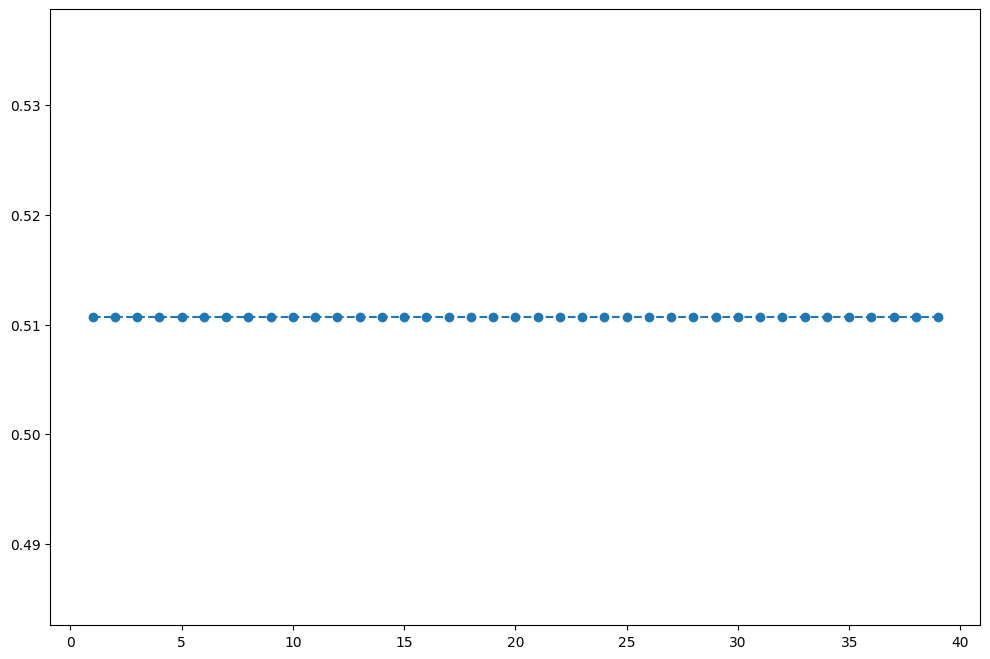

In [71]:
plt.figure(figsize=(12,8))
plt.plot(range(1,40),error_finder,marker='o',linestyle='--')

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
email.head(2)

,Email,Subject,Sender,Recipient,Date,Time,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
0,mikerusso@example.net,Even hotel community church.,emilyscott@example.org,gregorysmith@example.org,13-02-2023,04:13,3,0,191,32,3,3,0,11,1,1
1,waynebailey@example.org,Try themselves guess fight white agreement thu...,annwhite@example.net,gonzalezdaniel@example.net,09-08-2023,06:15,3,9,45,1,2,1,2,8,2,1


In [7]:
tfdv=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

In [9]:
text=email[['Email','Subject','Sender','Recipient']]

In [10]:
token=tfdv.fit_transform(text)

In [12]:
token

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [13]:
y=email['Spam Indicator']

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
from sklearn.preprocessing import LabelEncoder
laben=LabelEncoder()

In [21]:
email['Email']=laben.fit_transform(email['Email'])
email['Subject']=laben.fit_transform(email['Subject'])
email['Sender']=laben.fit_transform(email['Sender'])
email['Recipient']=laben.fit_transform(email['Recipient'])

In [22]:
email.head()

,Email,Subject,Sender,Recipient,Date,Time,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
0,3706,1607,1530,1891,13-02-2023,04:13,3,0,191,32,3,3,0,11,1,1
1,5531,5523,274,1836,09-08-2023,06:15,3,9,45,1,2,1,2,8,2,1
2,2499,1592,1207,3682,16-05-2023,01:32,3,9,52,1,4,0,2,10,1,1
3,2599,4736,3184,4750,25-04-2023,14:50,2,3,75,6,0,2,0,8,2,0
4,3406,1748,5500,1520,11-07-2023,21:44,3,5,299,279,0,2,0,6,1,1


In [23]:
X=email.drop(['Spam Indicator','Date','Time'],axis=1)

In [25]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler=StandardScaler()

In [28]:
X_scaled=scaler.fit_transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logmodel=LogisticRegression(max_iter=1000)

In [34]:
results=logmodel.fit(X_train,y_train)

In [35]:
y_pred=results.predict(X_test)

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print('Matrx\n',confusion_matrix(y_test,y_pred))
print(('Report\n'),classification_report(y_test,y_pred))

Matrx
 [[439 480]
 [429 452]]
Report
               precision    recall  f1-score   support

           0       0.51      0.48      0.49       919
           1       0.48      0.51      0.50       881

    accuracy                           0.49      1800
   macro avg       0.50      0.50      0.49      1800
weighted avg       0.50      0.49      0.49      1800

